In [1]:
# Në pjesën 5, ne do të krahasojmë disa algortime ML për ndërtimin e modeleve të regresionit të inhibitorëve të 
# acetilkolinesterazës.
# Fillojmë me importimin e librarive:

In [1]:
import sys
!{sys.executable} -m pip install lazypredict

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [4]:
# Ngarkojmë datasetin

In [2]:
import urllib.request
url = 'https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
filename ='acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
urllib.request.urlretrieve(url, filename)

('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv',
 <http.client.HTTPMessage at 0x1def8b84640>)

In [3]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [5]:
# Parapërpunimi i të dhënave

In [6]:
# Shqyrtojmë dimensionin X
X.shape

(4695, 881)

In [7]:
# Largojmë veçoritë me variancë të ulët
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [8]:
# Ekzekutojmë ndarjen e të dhënave përmes 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
# Krahasojmë algoritmet ML

In [10]:
# Definojmë dhe ndërtojmë lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:38<00:00,  1.10it/s]


In [11]:
# Tabela e performancës (80% nëngrup)
predictions_train

,R-Squared,RMSE,Time Taken
Model,,,
DecisionTreeRegressor,0.86,0.57,0.13
ExtraTreeRegressor,0.86,0.57,0.11
ExtraTreesRegressor,0.86,0.57,5.00
GaussianProcessRegressor,0.86,0.57,3.40
RandomForestRegressor,0.83,0.64,3.45
XGBRegressor,0.83,0.65,1.56
BaggingRegressor,0.81,0.67,0.47
MLPRegressor,0.77,0.75,5.35
HistGradientBoostingRegressor,0.69,0.87,5.42


In [13]:
# Performance table of the test set (20% subset)
predictions_test

,R-Squared,RMSE,Time Taken
Model,,,
HistGradientBoostingRegressor,0.54,1.06,4.99
RandomForestRegressor,0.52,1.07,3.45
LGBMRegressor,0.52,1.08,0.25
XGBRegressor,0.51,1.09,0.58
BaggingRegressor,0.49,1.11,0.41
NuSVR,0.48,1.12,2.02
SVR,0.48,1.12,2.55
KNeighborsRegressor,0.46,1.14,0.65
MLPRegressor,0.45,1.15,5.79


In [16]:
# Vizualizimi i të dhënave të përfomancës së modelit

[(0.0, 1.0)]

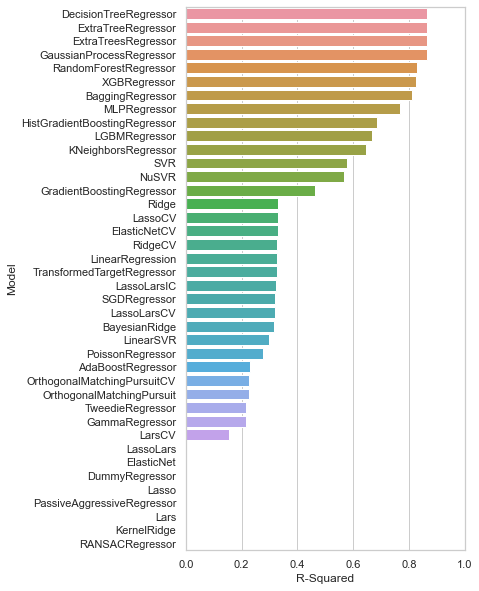

In [14]:
# Bar plot i vlerave R-Squared (R-Katror)
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

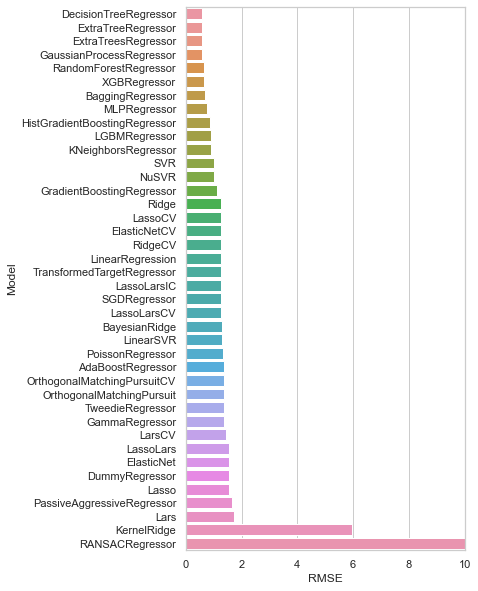

In [16]:
# Bar plot i vlerave RMSE
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

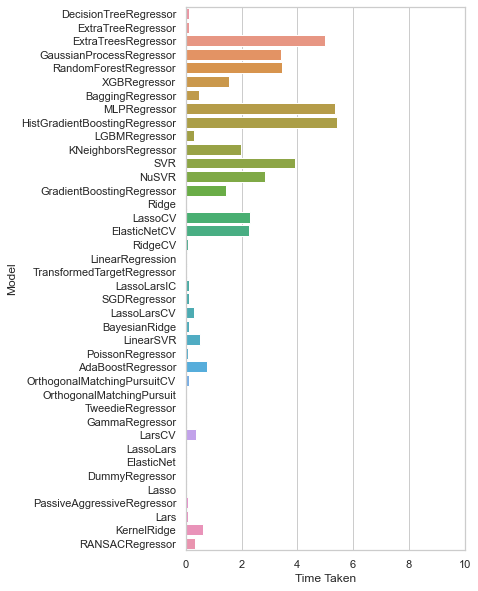

In [15]:
# Bar plot i kohës së kalkulimit
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))